## **Sessa Empirical Estimator**  
### *By Jyreneah Angel and Nicole Grace Joligon* 

## **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from some_module import See_KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import ecdf

## **CONVERSION**

***Import Dataset***

In [66]:
# Load simulated data based on med.events
import pandas as pd

simulated_df = pd.read_csv("../med_events.csv")

# Display the last few rows
print(simulated_df.tail())

      PATIENT_ID        DATE  PERDAY CATEGORY  DURATION
1075         100  07/19/2023       5     medA         7
1076         100  08/22/2024       5     medB        30
1077         100  09/26/2025       5     medA        14
1078         100  10/27/2023       2     medA        14
1079         100  11/30/2024       1     medB        60


***Match R function***

In [67]:
# Rename columns in the dataframe
new_columns = ["pnr", "eksd", "perday", "ATC", "dur_original"]
simulated_df = simulated_df.set_axis(new_columns, axis=1)

# Display the first few rows
simulated_df.head()

,pnr,eksd,perday,ATC,dur_original
0,1,01/01/2023,1,medB,60
1,1,02/05/2024,5,medA,60
2,1,03/11/2025,1,medB,90
3,1,04/11/2023,3,medB,90
4,1,05/15/2024,1,medB,60


***eksd string to DateTime***

In [68]:
simulated_df['eksd'] = pd.to_datetime(simulated_df['eksd'])

simulated_df.head()

,pnr,eksd,perday,ATC,dur_original
0,1,2023-01-01,1,medB,60
1,1,2024-02-05,5,medA,60
2,1,2025-03-11,1,medB,90
3,1,2023-04-11,3,medB,90
4,1,2024-05-15,1,medB,60


## **DATA ANALYSIS**

In [69]:
# Count missing values in each column
simulated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pnr           1080 non-null   int64         
 1   eksd          1080 non-null   datetime64[ns]
 2   perday        1080 non-null   int64         
 3   ATC           1080 non-null   object        
 4   dur_original  1080 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 38.0+ KB


In [70]:
# Display DataFrame summary  
simulated_df.isnull().sum()

pnr             0
eksd            0
perday          0
ATC             0
dur_original    0
dtype: int64

In [71]:
# Get summary statistics of the DataFrame
simulated_df.describe(include="all")

,pnr,eksd,perday,ATC,dur_original
count,1080.000000,1080,1080.000000,1080,1080.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,medB,NaN
freq,NaN,NaN,NaN,550,NaN
mean,49.759259,2024-06-23 12:00:00,3.012963,NaN,39.473148
min,1.000000,2023-01-01 00:00:00,1.000000,NaN,7.000000
25%,25.000000,2023-09-27 18:00:00,2.000000,NaN,14.000000
50%,50.000000,2024-06-23 12:00:00,3.000000,NaN,30.000000
75%,74.000000,2025-03-20 06:00:00,4.000000,NaN,60.000000
max,100.000000,2025-12-15 00:00:00,5.000000,NaN,90.000000


***Distribution of 'perday'***

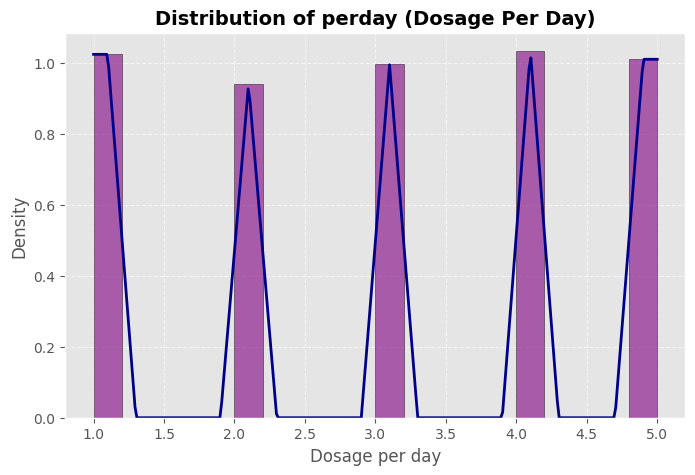

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 5))

counts, bins, _ = ax.hist(simulated_df["perday"], bins=20, color="purple", edgecolor="black", alpha=0.6, density=True)

bin_centers = (bins[:-1] + bins[1:]) / 2  # Get center points of bins
smoothed_curve = np.interp(np.linspace(bins[0], bins[-1], 300), bin_centers, counts)

ax.plot(np.linspace(bins[0], bins[-1], 300), smoothed_curve, color="darkblue", linewidth=2)

ax.set_title("Distribution of perday (Dosage Per Day)", fontsize=14, fontweight="bold")
ax.set_xlabel("Dosage per day", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.6)

plt.show()


***Distribution of 'dur_original'***

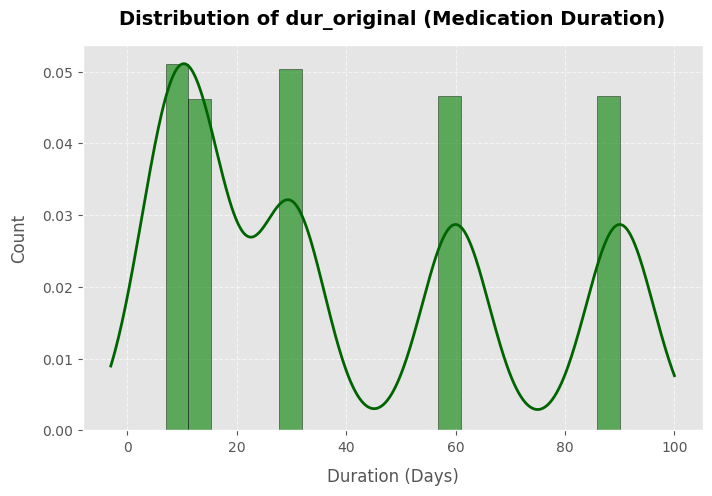

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 5))

data = simulated_df["dur_original"].dropna()

counts, bins, _ = ax.hist(data, bins=20, color="green", edgecolor="black", alpha=0.6, density=True)

kde = gaussian_kde(data, bw_method=0.2)  

x_vals = np.linspace(min(data) - 10, max(data) + 10, 500)
y_vals = kde(x_vals)

y_vals *= max(counts) / max(y_vals)

ax.plot(x_vals, y_vals, color="darkgreen", linewidth=2, linestyle="-")

ax.set_title("Distribution of dur_original (Medication Duration)", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Duration (Days)", fontsize=12, labelpad=10)
ax.set_ylabel("Count", fontsize=12, labelpad=10)
ax.grid(True, linestyle="--", alpha=0.6)

plt.show()


***Count of unique values in 'ATC'***

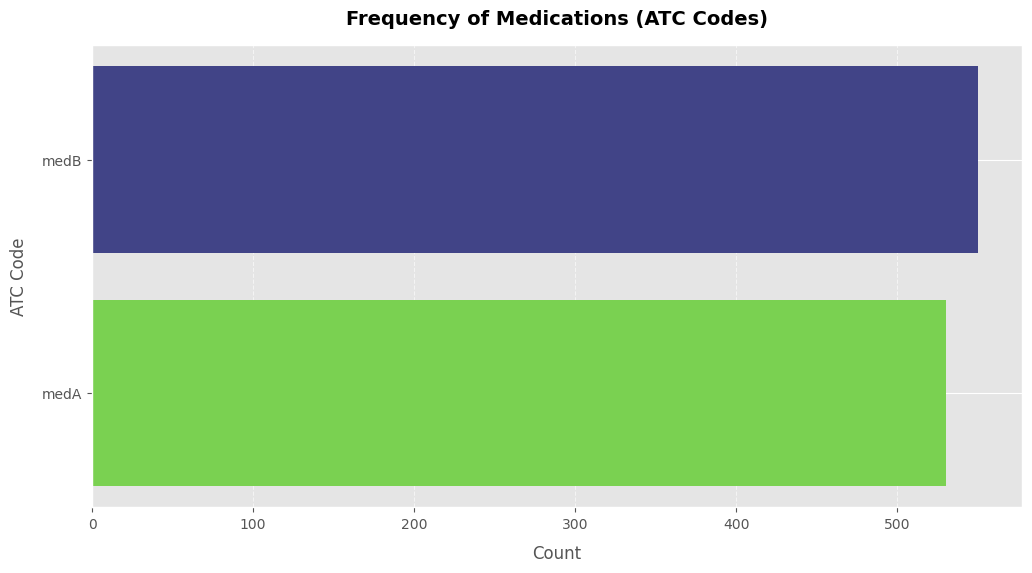

In [74]:
import matplotlib.pyplot as plt

atc_counts = simulated_df["ATC"].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(atc_counts.index, atc_counts.values, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(atc_counts))))

ax.set_title("Frequency of Medications (ATC Codes)", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Count", fontsize=12, labelpad=10)
ax.set_ylabel("ATC Code", fontsize=12, labelpad=10)

ax.invert_yaxis()

ax.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()


***Trend of medication start dates over time***

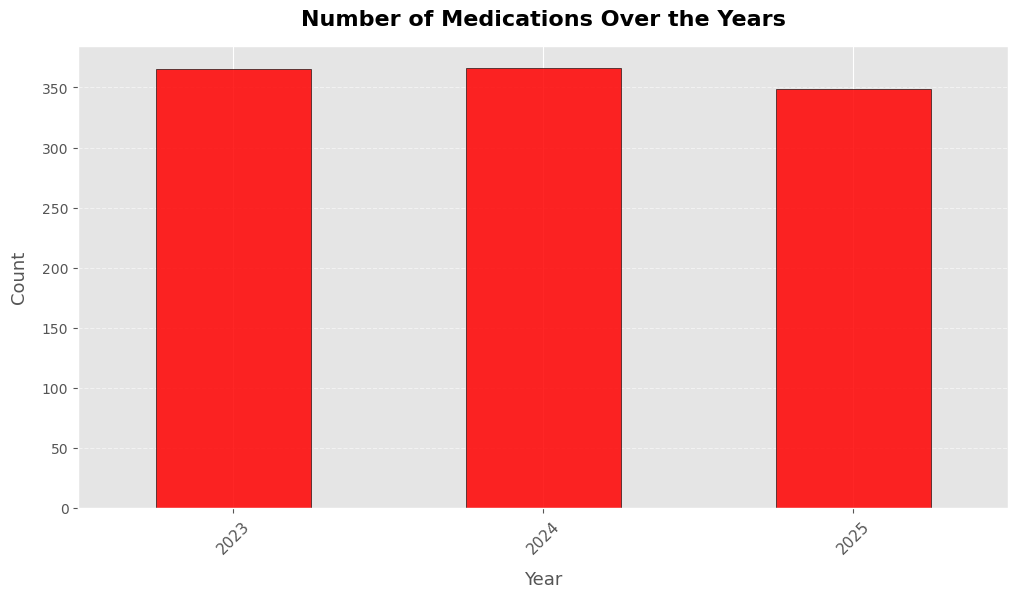

In [75]:
import matplotlib.pyplot as plt

year_counts = simulated_df["eksd"].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))

year_counts.plot(kind="bar", color="red", edgecolor="black", alpha=0.85)

plt.title("Number of Medications Over the Years", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=13, labelpad=10)
plt.ylabel("Count", fontsize=13, labelpad=10)

plt.xticks(rotation=45, fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


***Boxplots***

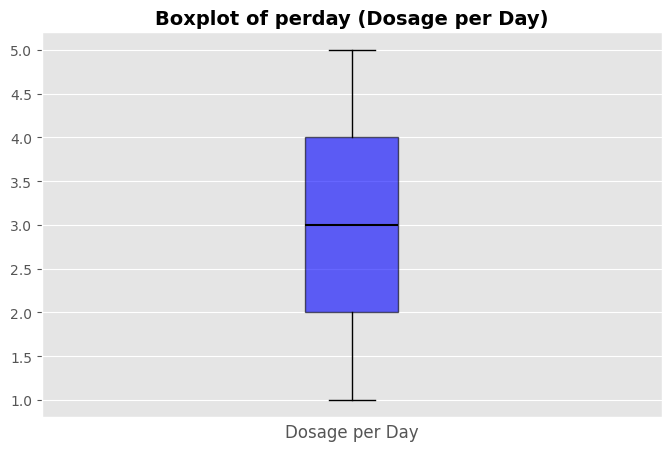

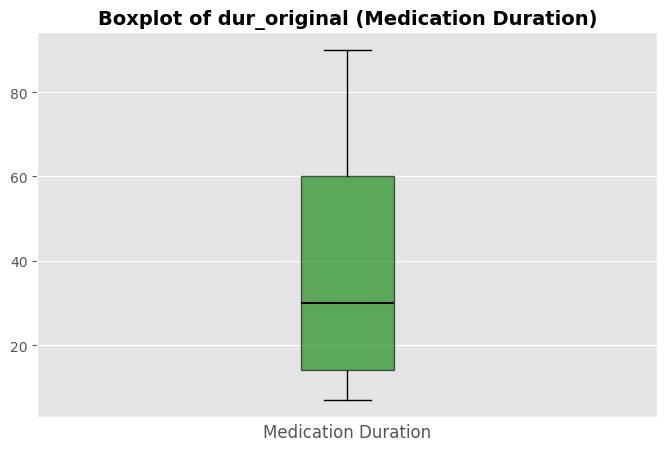

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

ax.boxplot(simulated_df["perday"].dropna(), patch_artist=True, boxprops=dict(facecolor="blue", alpha=0.6), 
           medianprops=dict(color="black", linewidth=1.5), whiskerprops=dict(color="black"), capprops=dict(color="black"))

ax.set_title("Boxplot of perday (Dosage per Day)", fontsize=14, fontweight="bold")
ax.set_xlabel("Dosage per Day", fontsize=12)
ax.set_xticks([])  

plt.show()


fig, ax = plt.subplots(figsize=(8, 5))

ax.boxplot(simulated_df["dur_original"].dropna(), patch_artist=True, boxprops=dict(facecolor="green", alpha=0.6), 
           medianprops=dict(color="black", linewidth=1.5), whiskerprops=dict(color="black"), capprops=dict(color="black"))

ax.set_title("Boxplot of dur_original (Medication Duration)", fontsize=14, fontweight="bold")
ax.set_xlabel("Medication Duration", fontsize=12)
ax.set_xticks([])

plt.show()


***Correlation Heatmap***

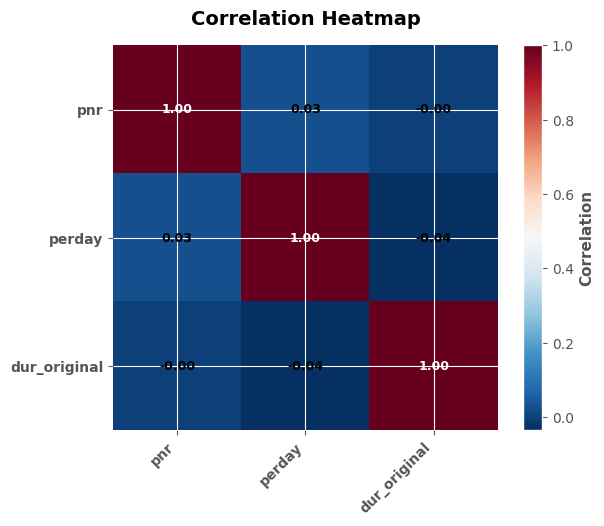

In [77]:
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = simulated_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 5))

cax = ax.imshow(corr_matrix, cmap="RdBu_r", interpolation="nearest")

cbar = plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlation", fontsize=11, fontweight="bold")

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right", fontsize=10, fontweight="bold")
ax.set_yticklabels(corr_matrix.columns, fontsize=10, fontweight="bold")

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        color = "white" if abs(value) > 0.5 else "black" 
        ax.text(j, i, f"{value:.2f}", ha="center", va="center", color=color, fontsize=9, fontweight="bold")

ax.set_title("Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)

ax.spines[:].set_visible(False)

plt.show()




## **SIMULATE**

***Sessa Empirical Estimator using K Means***

**A. ATC = medA**